<a href="https://colab.research.google.com/github/Zeynep-Dogan/IE-423/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
```

## <font color='#475468'> Football Players: </font>
### <font color='#475468'> Can you predict current value of football players based on their player information?</font>

## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfplayers = pd.read_csv('/content/drive/MyDrive/ie 423/task1-2_data.csv')

In [ ]:
dfplayers.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
dfplayers.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Current Value

In [ ]:
# Assign independent(Y) and dependent(X) variables
X = dfplayers.loc[:,['age','award']]
Y = dfplayers.loc[:,['current_value']]

In [ ]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [ ]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [10977433.532875]
Coefficients: 
 [[-349573.95659803  892057.02140338]]


when age and award is equal to '0' the player's current value is approximately $10977434. Age of the players affects the current value negatively while number of awards affects positively.

In [ ]:
# Generate new prediction - aka run scoring model
new_age = 33
new_award = 7
print ('Predicted Recent Value of the Player: \n', regr.predict([[new_age, new_award]]))

Predicted Recent Value of the Player: 
 [[5685892.11496377]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


when the player is 33 years old and has 7 awards his current value is approximately $5685892

utexas_ds_orie_divider_gray.png

## Explore Data

#### Histogram of current values where the bins cover $10000000 increments

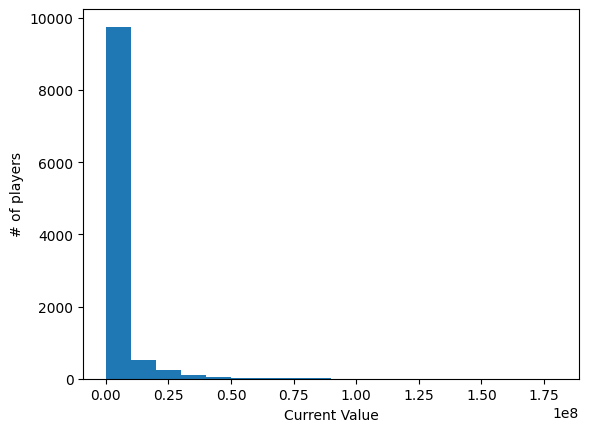

In [ ]:
# Set data fields
y = dfplayers.loc[:,'current_value']

# Set histogram parameters
binwidth = 10000000
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('# of players')
plt.show()

The distribution of values is skewed right and peak of the graph is at x=0. The long tail indicates both the possibility and rarity of the values. So, when these are considered the data fits to Chi-square distribution.

#### Histogram of current values where the bins cover $1000000 increments

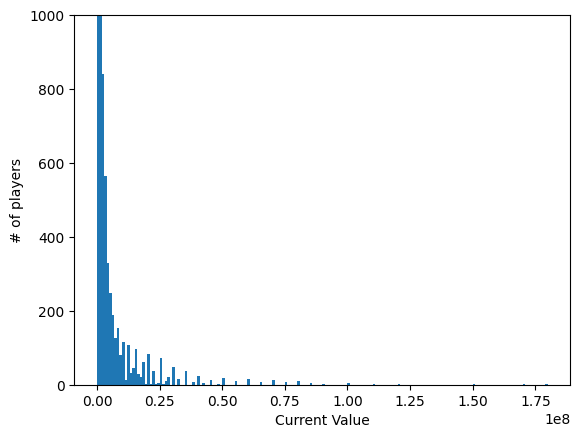

In [ ]:
# Set data fields
y = dfplayers.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000

binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('# of players')
plt.ylim(0, 1000)
plt.show()

The graph looks like F-distribution with dof (1,1). It is heavily right-skewed where it is the highest when x is zero and goes to zero while x increase. Since the right tail of the distribution is very long, we can say that larger values are possible but less likely.

#### Scatterplot of appearance vs. current value of the players

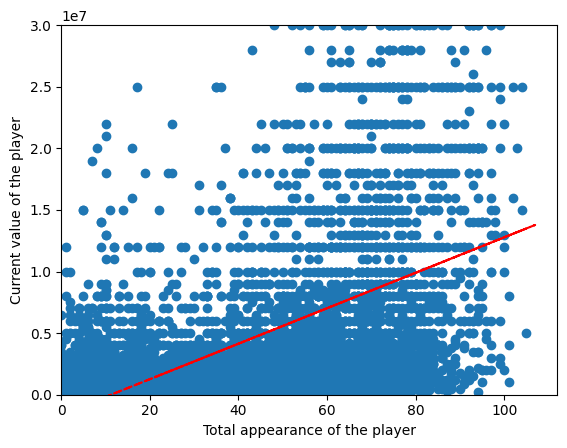

In [ ]:
# Set data fields
x = dfplayers.loc[:,'appearance']
y = dfplayers.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfplayers.loc[:,'appearance'])+5)
plt.ylim(0,30000000)
plt.xlabel('Total appearance of the player')
plt.ylabel('Current value of the player')
plt.show()

Points below the line correspond to current values of the players (according to their total appearance) that are lower than expected, and points above the line are higher than expected. The correlation between number of appearances and current value of the players is positive. The number of appearances of the players is highly concentrated between 0 and 90. There are some outliers such that a player has approximetely 20 appearance and his expected current value is less than $$2500000. However, he has a current value of approximately $25000000.

In [ ]:
# Assign independent(Y) and dependent(X) variables
X = dfplayers.loc[:,['appearance']]
Y = dfplayers.loc[:,['current_value']]

In [ ]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [ ]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-1615688.18096391]
Coefficients: 
 [[143891.49163924]]


As we can both see in scatterplot and through the interception of regression when the number of appearances is approx. less than 13 the current value becomes negative which is not logical.

#### Scatterplot of assists vs. current value of players separated by player's position

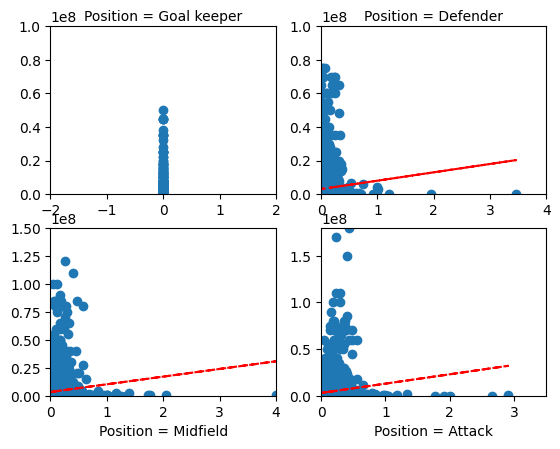

In [ ]:
fig, axs = plt.subplots(2, 2)

# position = goalkeeper assist vs. current value graph
x = dfplayers.loc[(dfplayers['position_encoded']==1),'assists']
y = dfplayers.loc[(dfplayers['position_encoded']==1),'current_value']

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(-2,np.max(2))
axs[0, 0].set_ylim(0,np.max(100000000))
axs[0, 0].set_xlabel('Position = Goal keeper')
axs[0, 0].xaxis.set_label_position("top")

# position = defender assist vs. current value graph
x = dfplayers.loc[(dfplayers['position_encoded']==2),'assists']
y = dfplayers.loc[(dfplayers['position_encoded']==2),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfplayers.loc[:,'assists']))
axs[0, 1].set_ylim(0,np.max(100000000))
axs[0, 1].set_xlabel('Position = Defender')
axs[0, 1].xaxis.set_label_position("top")

# position = midfield assist vs. current value graph
x = dfplayers.loc[(dfplayers['position_encoded']==3),'assists']
y = dfplayers.loc[(dfplayers['position_encoded']==3),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfplayers.loc[:,'assists']))
axs[1, 0].set_ylim(0,np.max(150000000))
axs[1, 0].set_xlabel('Position = Midfield')

# position = attack assist vs. current value graph
x = dfplayers.loc[(dfplayers['position_encoded']==4),'assists']
y = dfplayers.loc[(dfplayers['position_encoded']==4),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(3.5))
axs[1, 1].set_ylim(0,np.max(dfplayers.loc[:,'current_value']))
axs[1, 1].set_xlabel('Position = Attack')
axs[1, 1].yaxis.set_label_position("right")


Plots indicates that all of the goal keepers has a number of assists = 0 where the attack players has the most assists on average. We can also say that the attack players tend to have higher current values among the four groups while goal keepers have the least.